## read xlsx file
this file aims to deal with commensurate issue</br>
as well as correlation between features</br>
please notice that</br>
the categorical attrs in columns are all interval attrs or binary attrs(0 or 1)</br>
so, we don't need to convert any attr to onehot encoding.


In [1]:
import pandas as pd
tr = pd.read_excel('./temp/2_data_imputation_onehot.xlsx')

In [2]:
tr.shape#expected 68 attr(include outcome)

(52157, 96)

<AxesSubplot:>

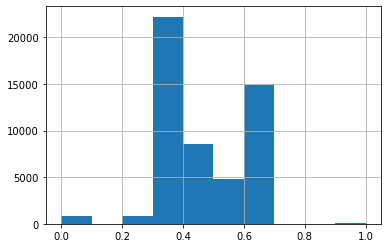

In [3]:
tr.ASA.hist()

### step1:yeojohnson transfomation
deal with those attr with skewed dist

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

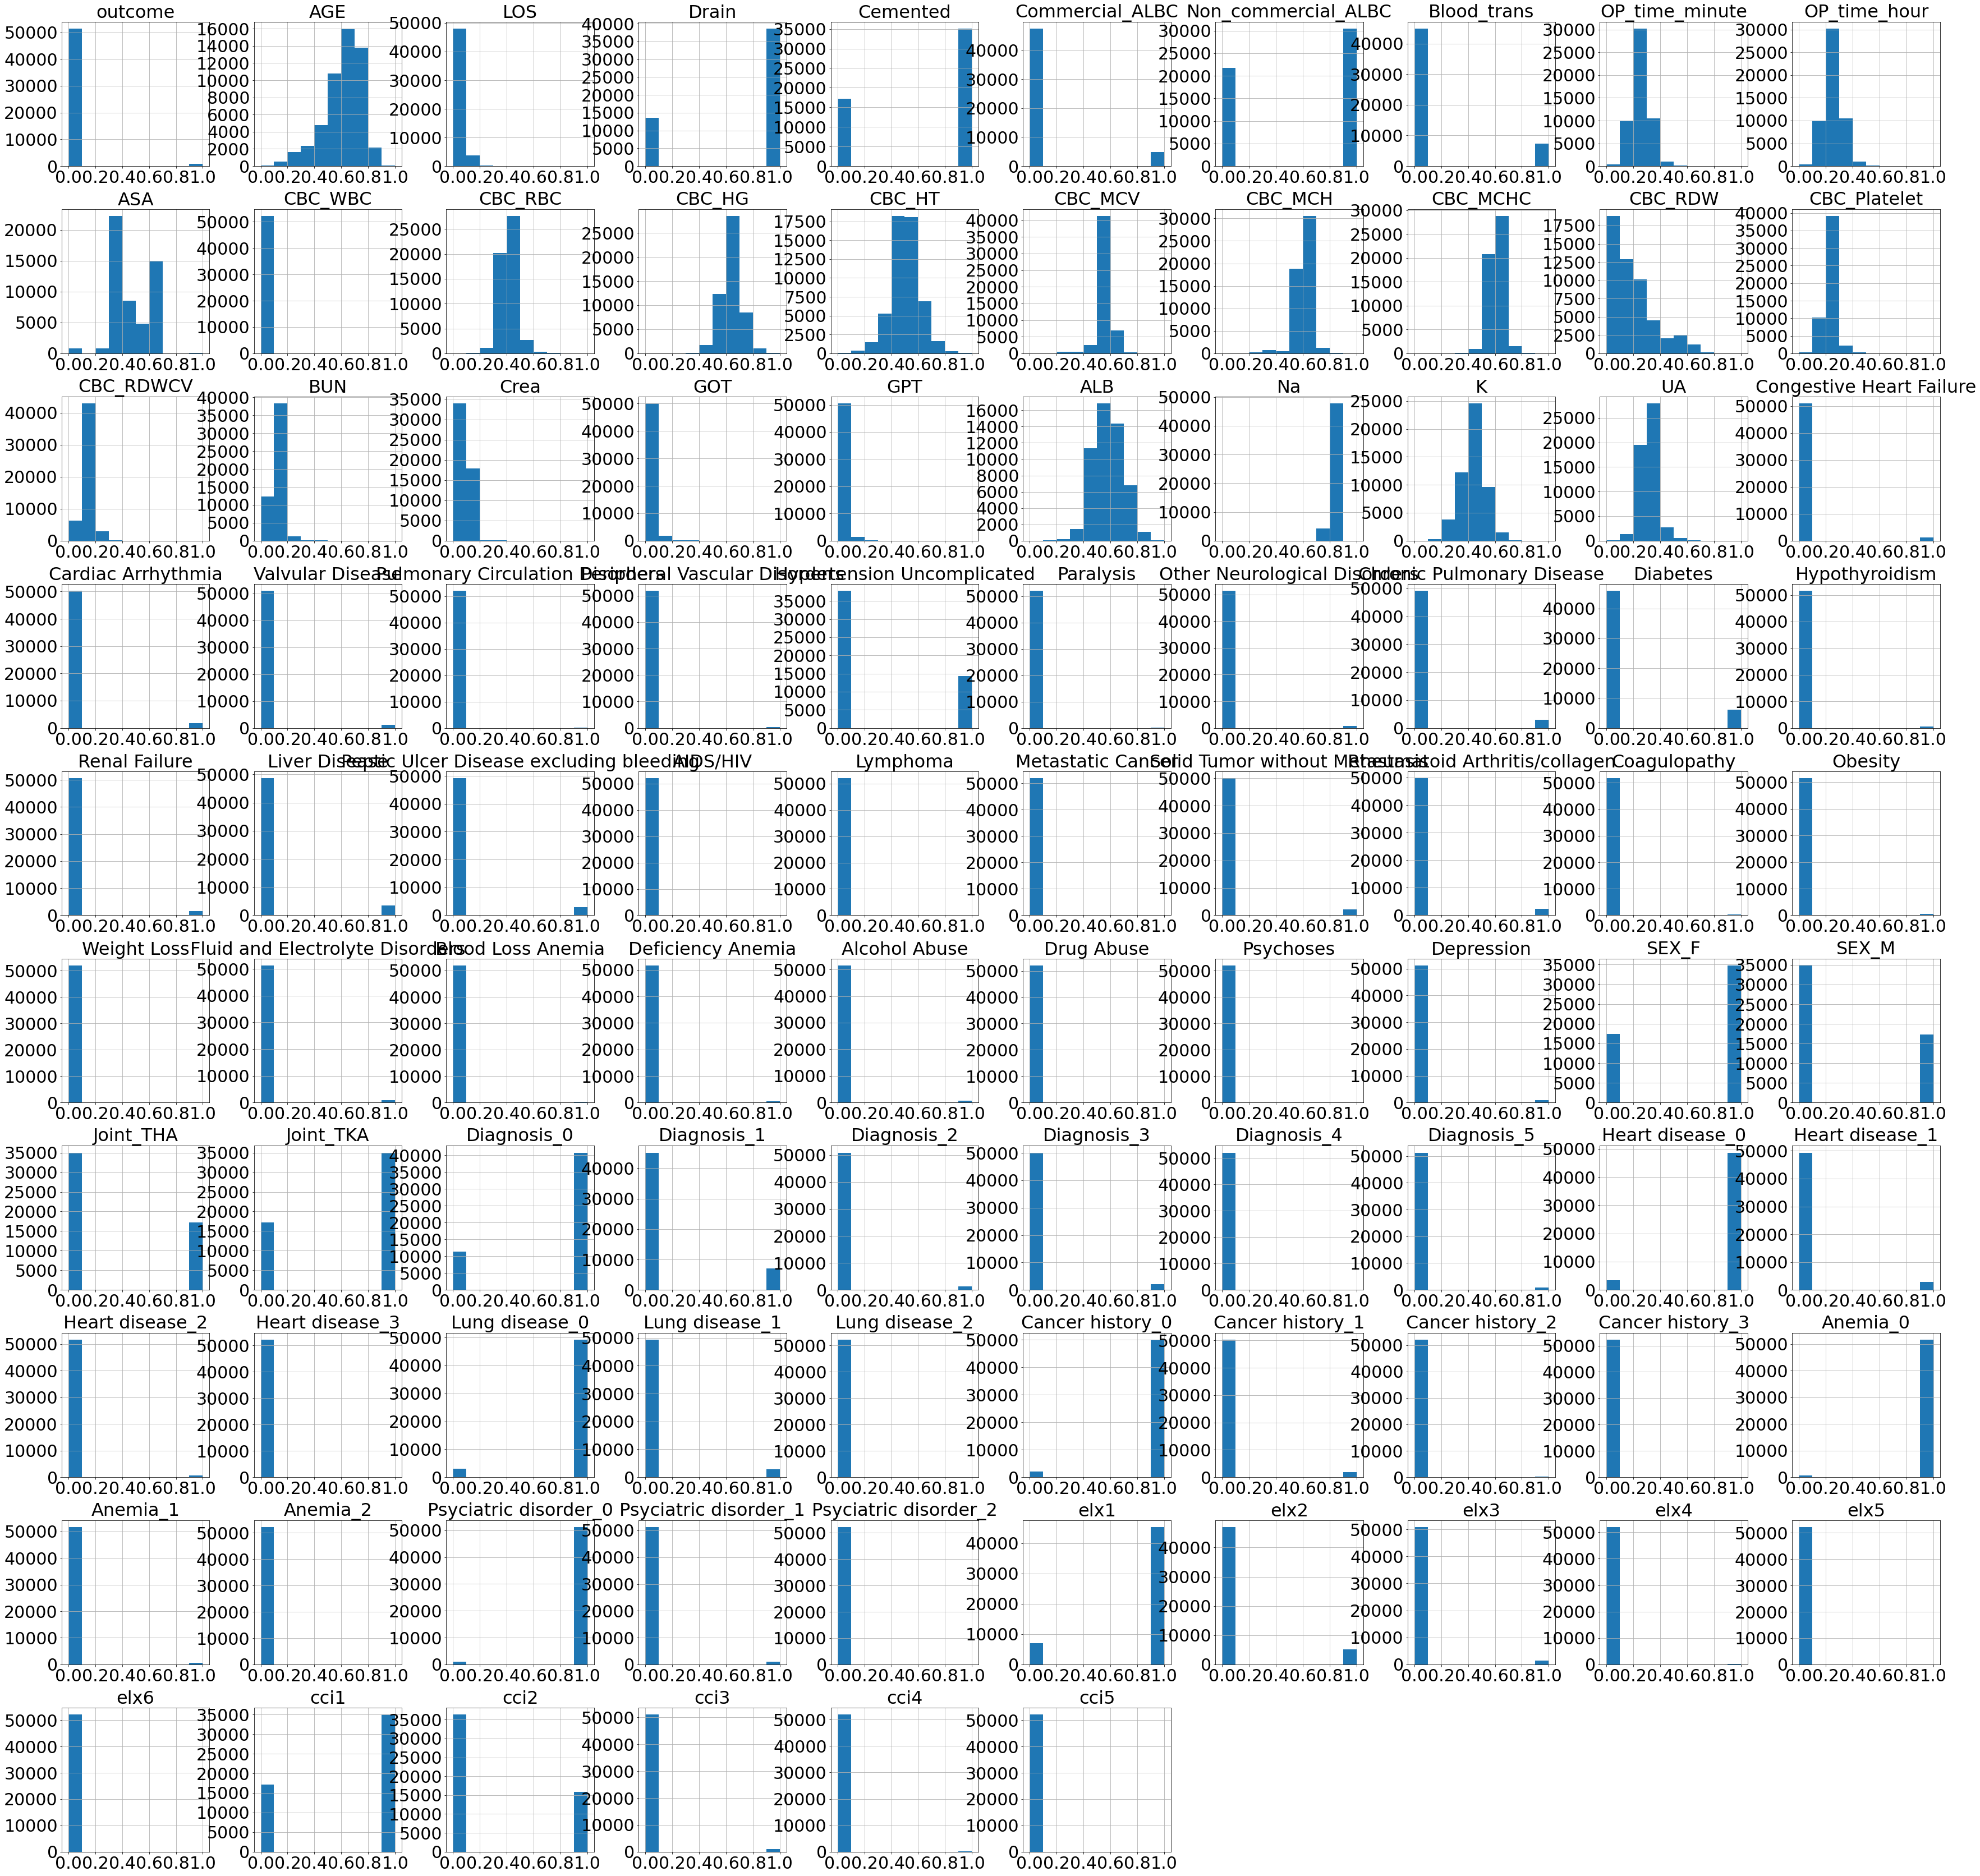

In [4]:
#check dist first
fig = tr.hist(figsize=(60, 60),
              xlabelsize=30, 
              ylabelsize=30)
[x.title.set_size(32) for x in fig.ravel()]

In [5]:
# from scipy.stats import yeojohnson as yj
# skewed_col = tr.select_dtypes('float').columns
# print(skewed_col)
# for col in skewed_col:
#     tr[col], _ = yj(tr[col])

In [6]:
tr.columns

Index(['outcome', 'AGE', 'LOS', 'Drain', 'Cemented', 'Commercial_ALBC',
       'Non_commercial_ALBC', 'Blood_trans', 'OP_time_minute', 'OP_time_hour',
       'ASA', 'CBC_WBC', 'CBC_RBC', 'CBC_HG', 'CBC_HT', 'CBC_MCV', 'CBC_MCH',
       'CBC_MCHC', 'CBC_RDW', 'CBC_Platelet', 'CBC_RDWCV', 'BUN', 'Crea',
       'GOT', 'GPT', 'ALB', 'Na', 'K', 'UA', 'Congestive Heart Failure',
       'Cardiac Arrhythmia', 'Valvular Disease',
       'Pulmonary Circulation Disorders', 'Peripheral Vascular Disorders',
       'Hypertension Uncomplicated', 'Paralysis',
       'Other Neurological Disorders', 'Chronic Pulmonary Disease', 'Diabetes',
       'Hypothyroidism', 'Renal Failure', 'Liver Disease',
       'Peptic Ulcer Disease excluding bleeding', 'AIDS/HIV', 'Lymphoma',
       'Metastatic Cancer', 'Solid Tumor without Metastasis',
       'Rheumatoid Arthritis/collagen', 'Coagulopathy', 'Obesity',
       'Weight Loss', 'Fluid and Electrolyte Disorders', 'Blood Loss Anemia',
       'Deficiency Anemia', 'A

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

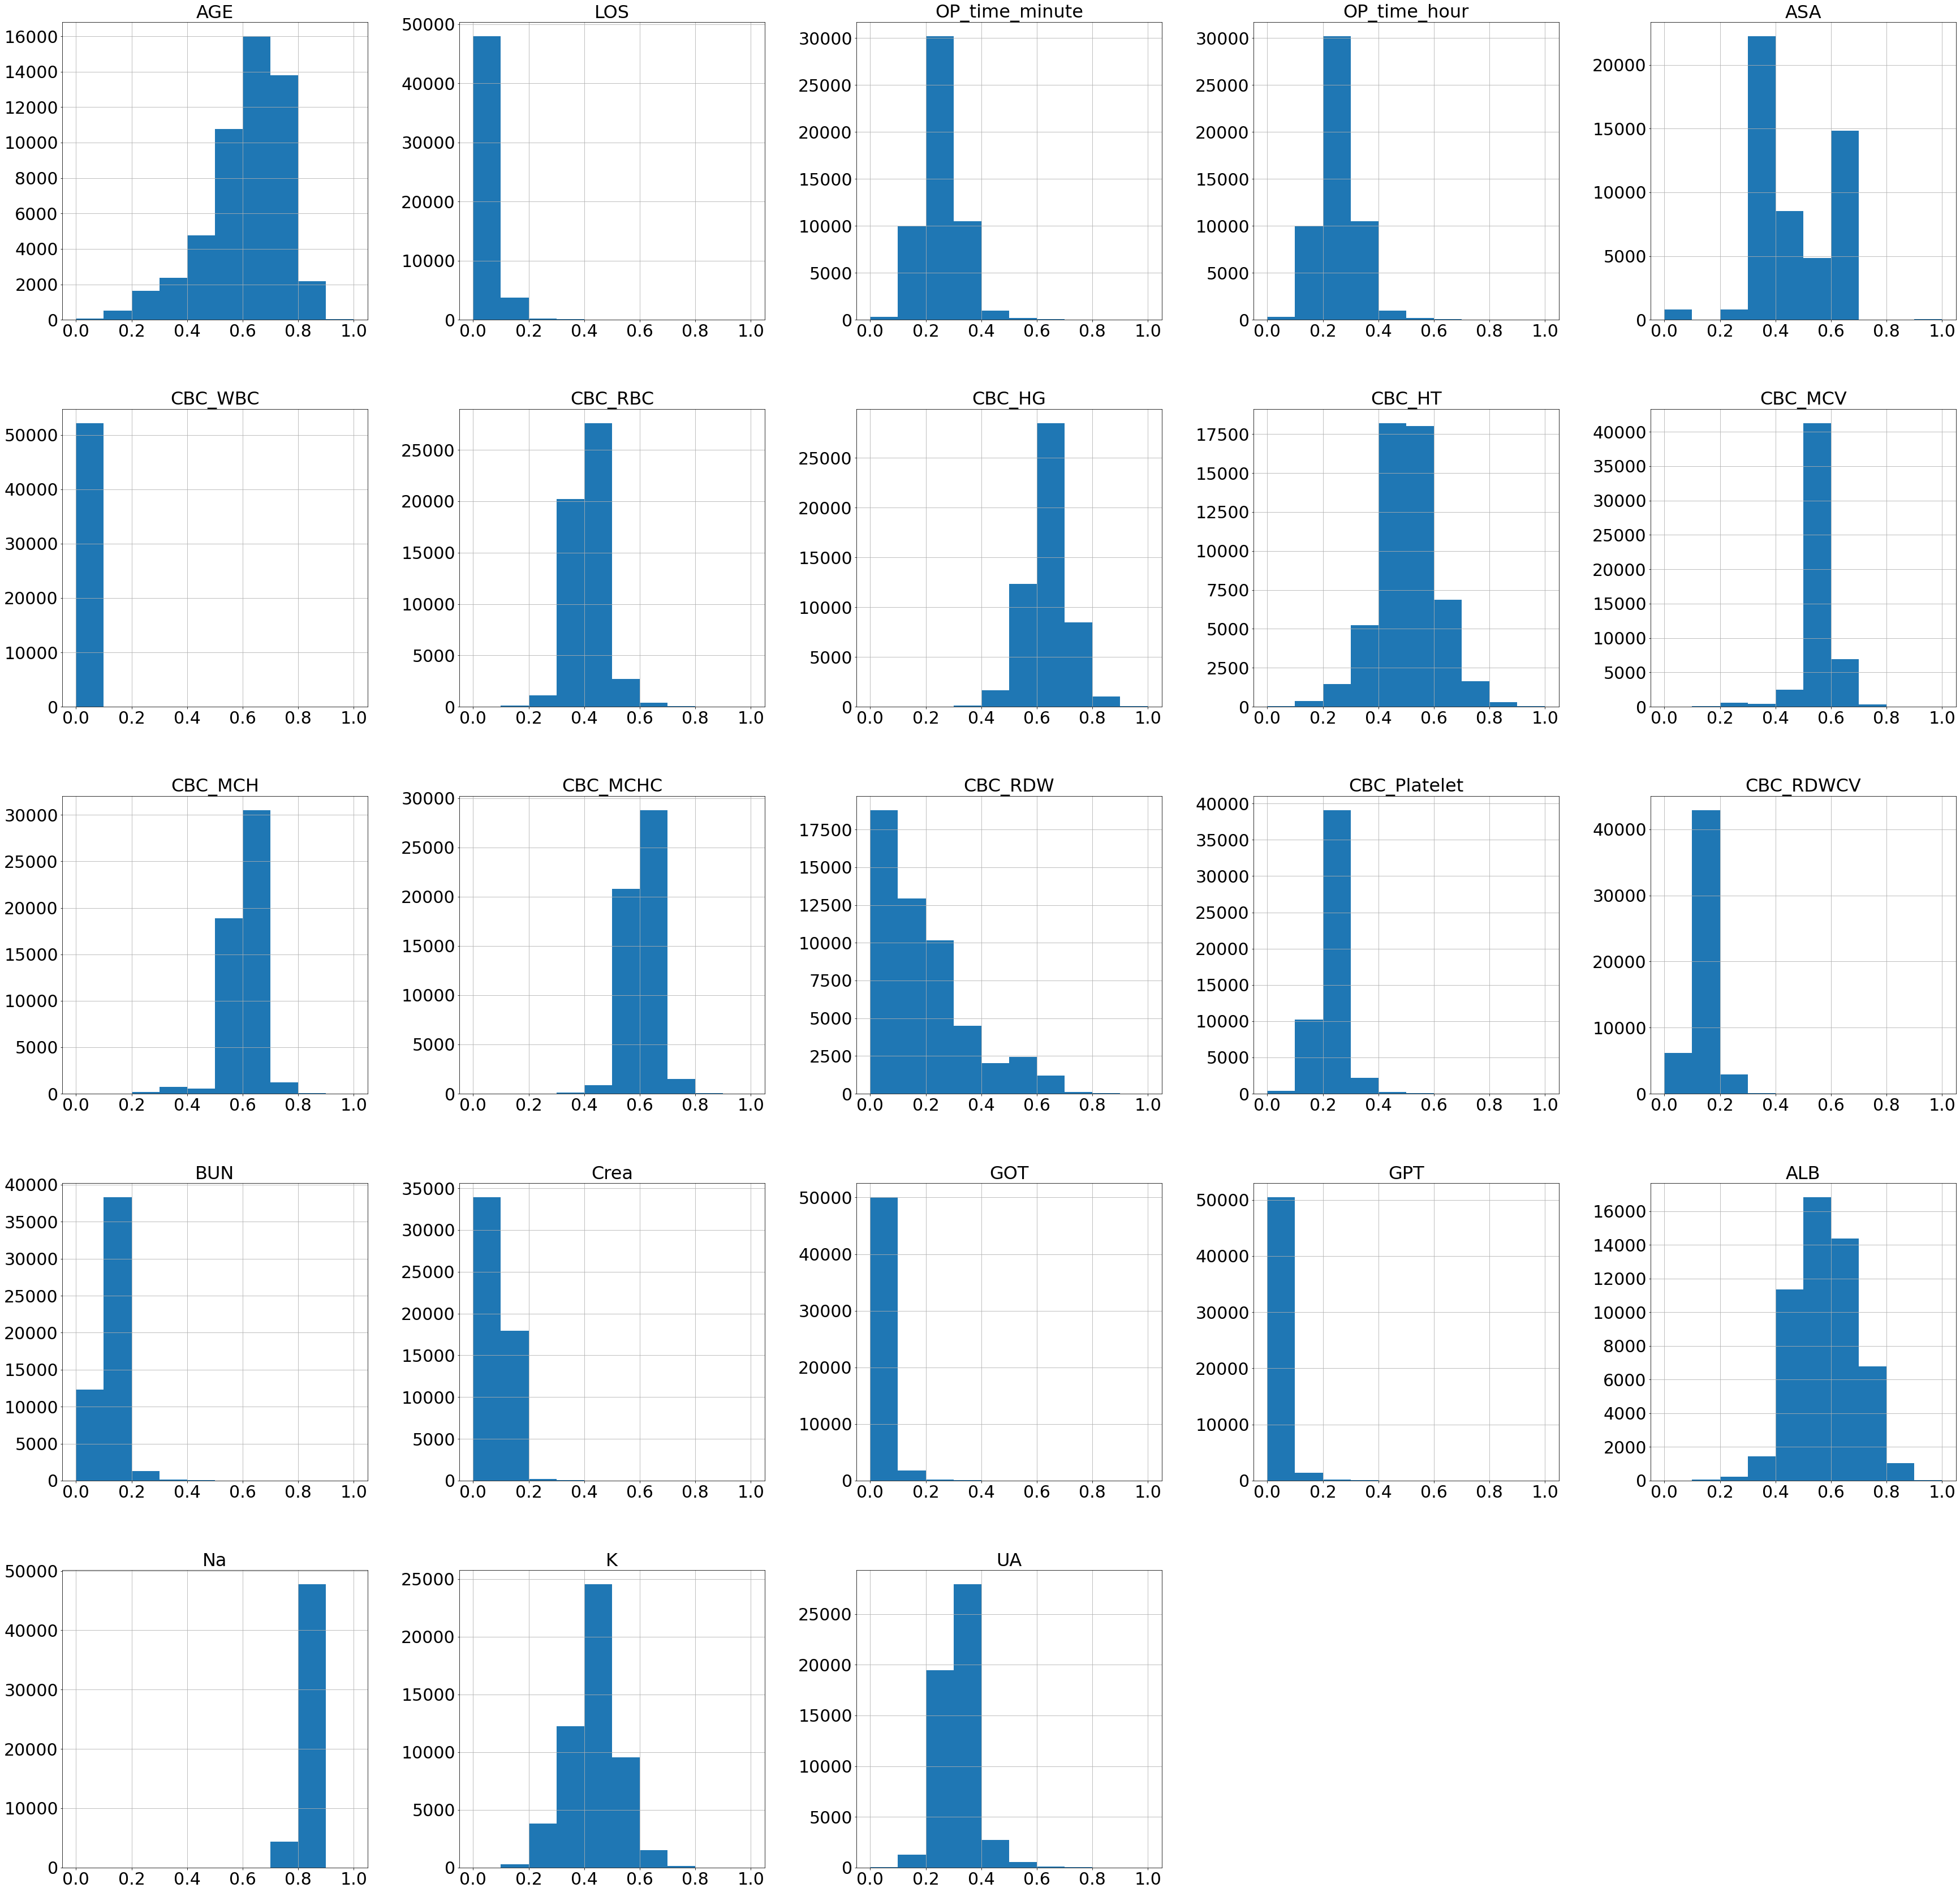

In [7]:
fig = tr.select_dtypes('float').hist(figsize=(60, 60),
                                      xlabelsize=30, 
                                      ylabelsize=30)
[x.title.set_size(32) for x in fig.ravel()]

### step2:deal with feature correlation

In [8]:
# first, before using some alg, we can use domain knowlege to find redundant fatures
# such as OP_time_hour = OP_time_minutes/60
# so , after scaling the data, we can see the column value between the both are totally the same
# thus, we can drop one feature.
# here, Idecided to remove minutes.
tr.drop(columns=['OP_time_minute'], inplace=True)

In [9]:
# !pip install collinearity

94
95


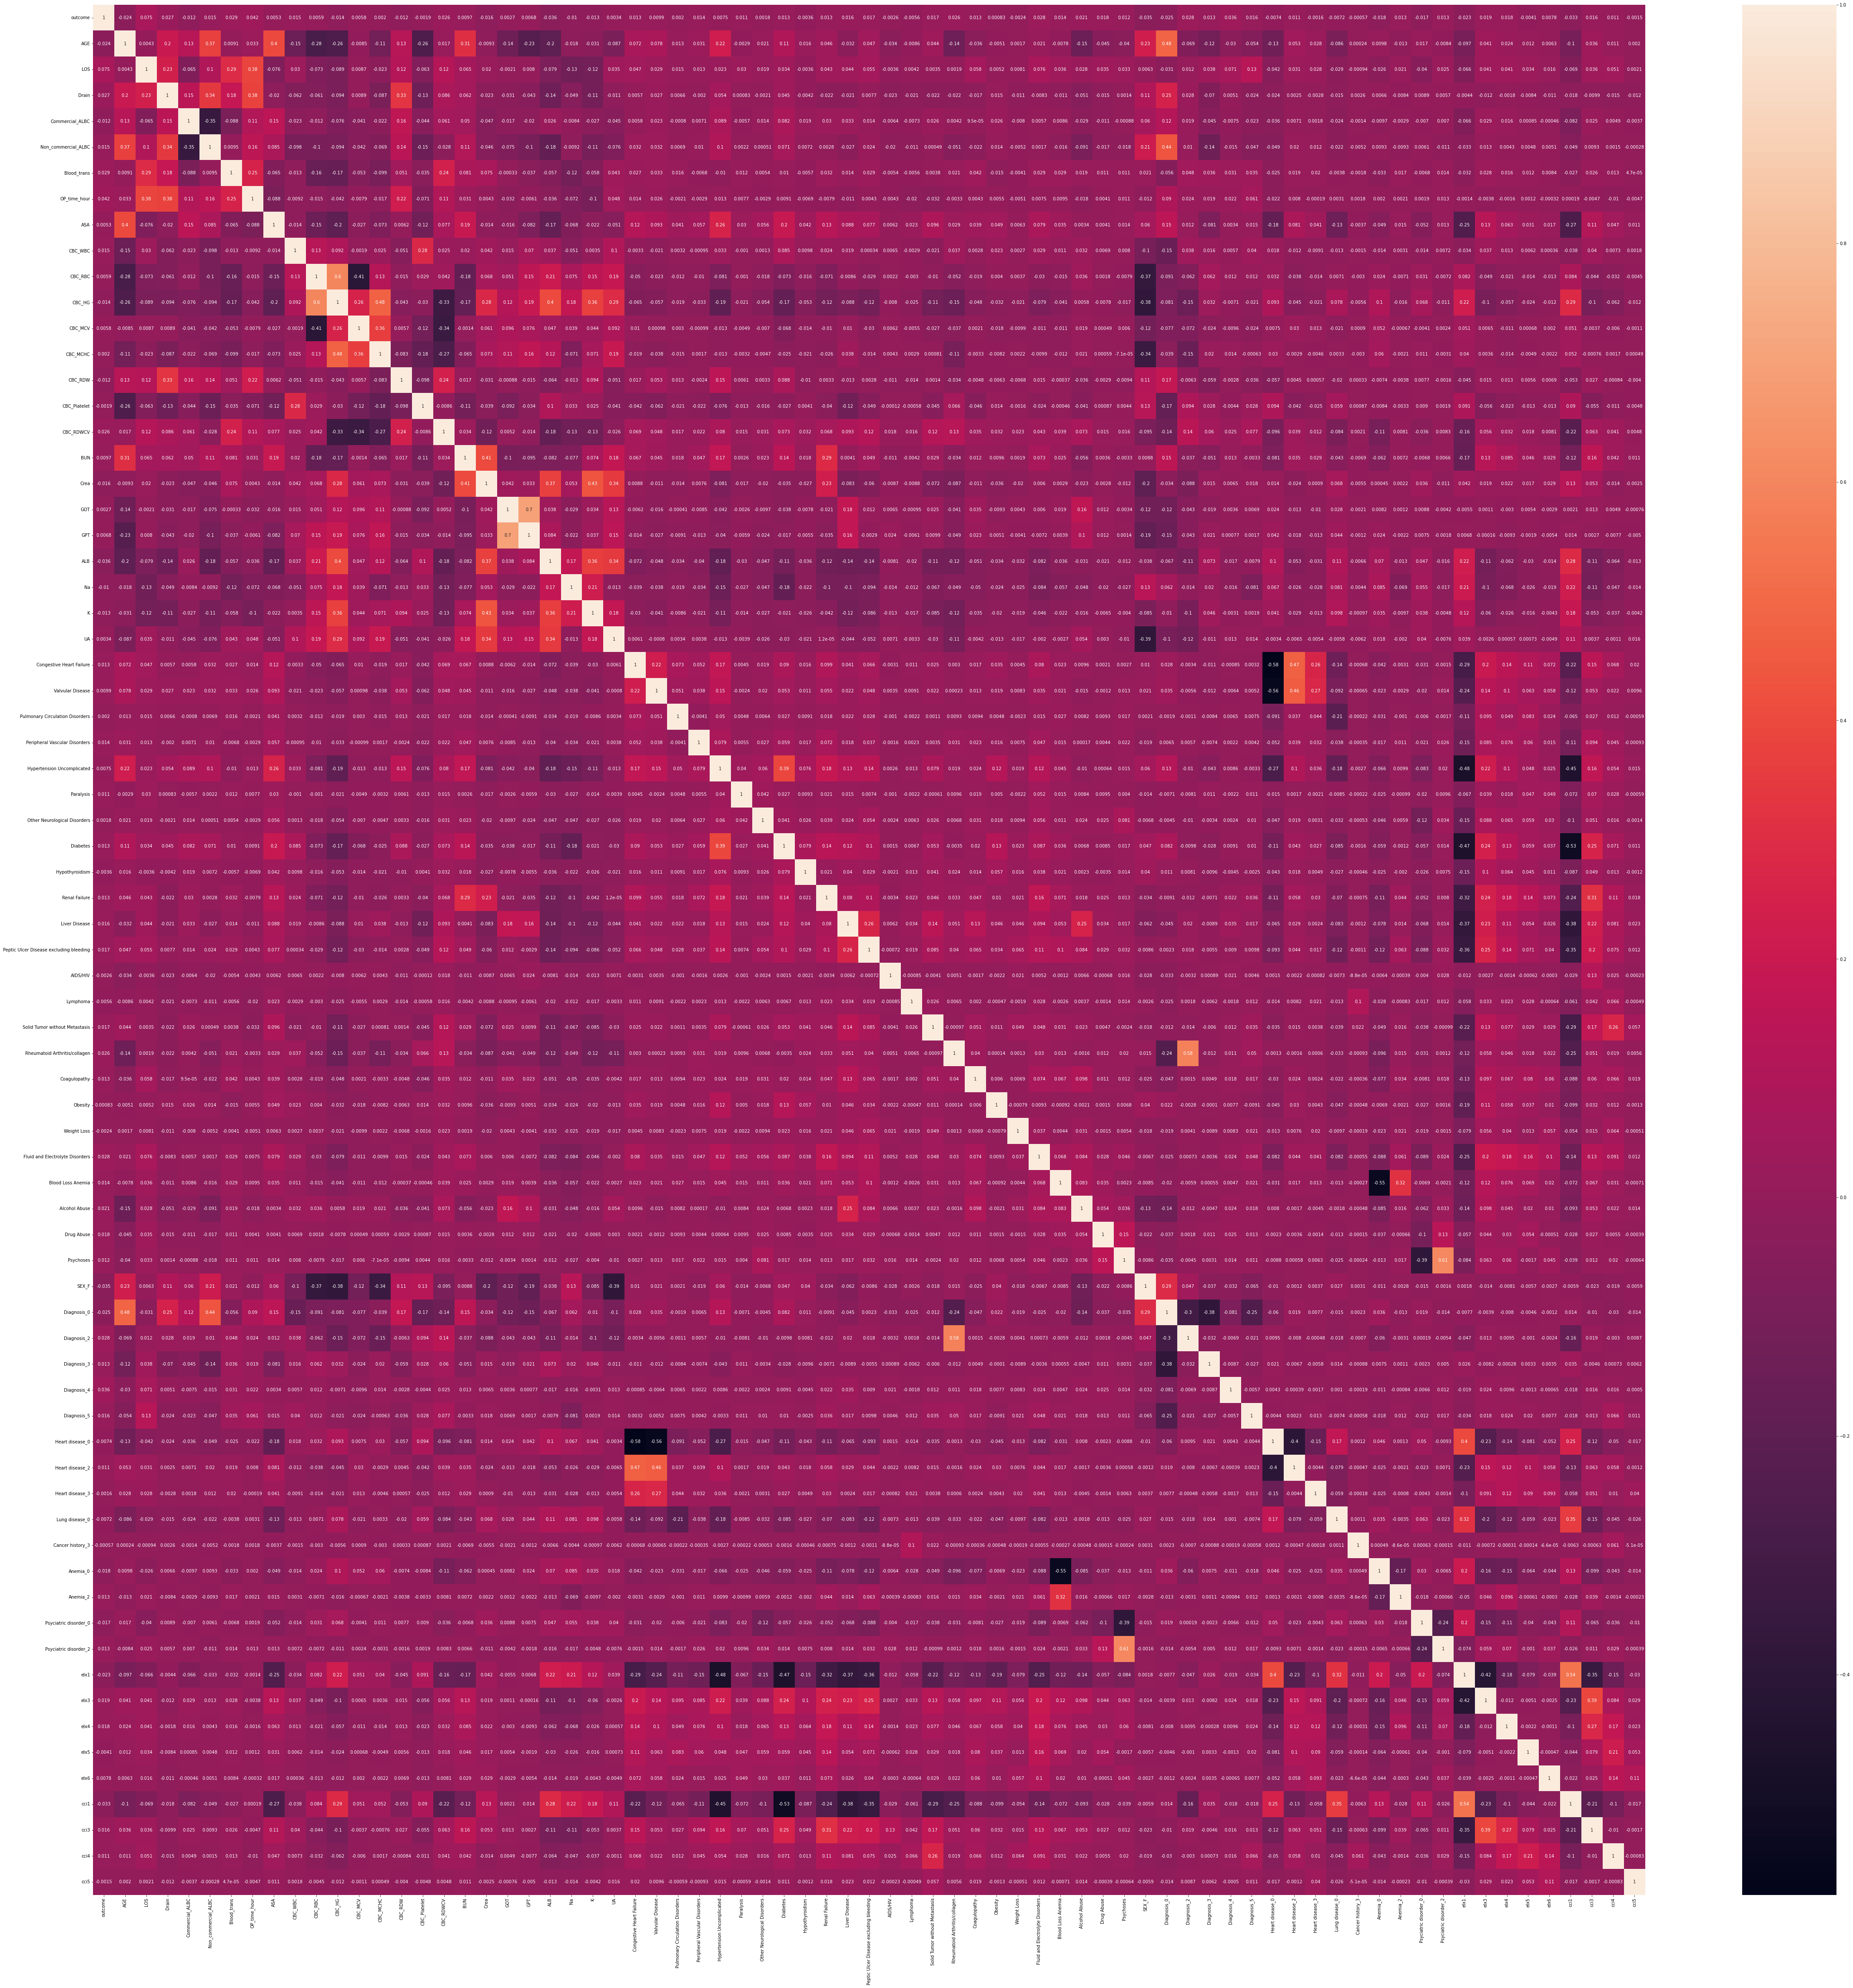

In [10]:
'''
After remove the bad feature, 
its time to use some mathematical methods to deal with the feature correlation.
https://www.researchgate.net/post/Why_lasso_ignore_a_important_feature_which_correlated_with_the_target_label
actually, LASSO can deal with the corrlation between different attrs(doesn't work imbalanced data )
for feature selection:
https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
'''
import seaborn as sn
import matplotlib.pyplot as plt
import scipy
from collinearity import SelectNonCollinear

selector = SelectNonCollinear(0.7)
selector.fit(tr.iloc[:, 1:].to_numpy(), tr['outcome'].to_numpy())
mask = selector.get_support()

print(len(mask))
mask.insert(0, True)
print(len(mask))

tr = tr.loc[:, mask]

corrMatrix = tr.corr()
fig, ax = plt.subplots(figsize=(80, 80))
sn.heatmap(corrMatrix, annot=True, ax=ax, xticklabels=True, yticklabels=True)
# sn.set(font_scale=0.2) # font size 2
plt.show()


In [11]:
# here, we use colinearity to reduce the number of features to 94
tr.shape

(52157, 73)

In [12]:
tr.columns

Index(['outcome', 'AGE', 'LOS', 'Drain', 'Commercial_ALBC',
       'Non_commercial_ALBC', 'Blood_trans', 'OP_time_hour', 'ASA', 'CBC_WBC',
       'CBC_RBC', 'CBC_HG', 'CBC_MCV', 'CBC_MCHC', 'CBC_RDW', 'CBC_Platelet',
       'CBC_RDWCV', 'BUN', 'Crea', 'GOT', 'GPT', 'ALB', 'Na', 'K', 'UA',
       'Congestive Heart Failure', 'Valvular Disease',
       'Pulmonary Circulation Disorders', 'Peripheral Vascular Disorders',
       'Hypertension Uncomplicated', 'Paralysis',
       'Other Neurological Disorders', 'Diabetes', 'Hypothyroidism',
       'Renal Failure', 'Liver Disease',
       'Peptic Ulcer Disease excluding bleeding', 'AIDS/HIV', 'Lymphoma',
       'Solid Tumor without Metastasis', 'Rheumatoid Arthritis/collagen',
       'Coagulopathy', 'Obesity', 'Weight Loss',
       'Fluid and Electrolyte Disorders', 'Blood Loss Anemia', 'Alcohol Abuse',
       'Drug Abuse', 'Psychoses', 'SEX_F', 'Diagnosis_0', 'Diagnosis_2',
       'Diagnosis_3', 'Diagnosis_4', 'Diagnosis_5', 'Heart disease_0',

In [13]:
tr.dtypes.value_counts()

int64      53
float64    20
dtype: int64

### step3:feature selection

#### use RF to do feature selection

In [14]:
# use rf with to do feature selection
# https://stats.stackexchange.com/questions/137100/what-is-the-difference-between-feature-selection-and-dimensionality-reduction
# difference between feature selection and dimension reduction
# and random sample trainig dataset as new training data
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, accuracy_score
    )
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

tr_x = tr.iloc[:, 1:]
print(tr_x.shape)
tr_y = tr['outcome']
print(tr_y.shape)
X_train, X_test, y_train, y_test = train_test_split(tr_x, tr_y, test_size=0.2, random_state=8, stratify=tr[['outcome']])


# train_X_new = data_tr.iloc[:, 1:68]
# train_y_new = data_tr.iloc[:, 0]
# train_X = data_tr.ilofit_sample8]
# train_y = data_tr.iloc[:, 0]
# print(train_X.shape)
# val_X = data_te.iloc[:, 1:68]
# val_y = data_te.iloc[:, 0]
# print(val_y.value_counts())

sam = RandomUnderSampler(random_state=43)
# sam = SMOTE()

X_train, y_train = sam.fit_sample(X_train, y_train)

n_estim = 100

# rfc = treDecisionTreeClassifiersifier()
rfc = RandomForestClassifier(n_estimators=n_estim,
                             class_weight='balanced',
                             random_state=42,
                             
                            )

# rfc.fit(tr_x, tr_y)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
print(pd.DataFrame(preds).value_counts())

prec = precision_score(y_test, preds)
reca = recall_score(y_test, preds)
roc = roc_auc_score(y_test, preds)
f1 = f1_score(y_test, preds)
acc = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

print("Precision: ", prec)
print("Recall: ", reca)
print("ROC score: ", roc)
print("F1 score: ", f1)
print("Accuracy score: ", acc)
print(conf_mat)
# data_tr = data_tr.groupby('outcome').sample(n=2000, random_state=1, replace=True)

# data_te = data_te.groupby('outcome').sample(n=down_te, random_state=1)




(52157, 72)
(52157,)
0    7666
1    2766
dtype: int64
Precision:  0.046637744034707156
Recall:  0.7329545454545454
ROC score:  0.7379183803715784
F1 score:  0.08769544527532291
Accuracy score:  0.7427147239263804
[[7619 2637]
 [  47  129]]


In [15]:
tr = pd.concat((X_train, y_train), axis=1)

In [16]:
tr

,AGE,LOS,Drain,Commercial_ALBC,Non_commercial_ALBC,Blood_trans,OP_time_hour,ASA,CBC_WBC,CBC_RBC,...,elx1,elx3,elx4,elx5,elx6,cci1,cci3,cci4,cci5,outcome
0,0.724138,0.014085,1,0,1,0,0.207585,0.666667,0.029181,0.396554,...,1,0,0,0,0,1,0,0,0,0
1,0.793103,0.084507,0,0,1,0,0.197605,0.666667,0.022650,0.300485,...,1,0,0,0,0,0,0,0,0,0
2,0.563218,0.112676,1,0,1,0,0.277312,0.333333,0.030578,0.394184,...,1,0,0,0,0,1,0,0,0,0
3,0.574713,0.098592,1,0,1,0,0.337325,0.333333,0.031635,0.425310,...,1,0,0,0,0,1,0,0,0,0
4,0.758621,0.042254,1,1,0,0,0.298736,0.533333,0.035447,0.479375,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0.597701,0.169014,1,0,1,0,0.278643,0.511111,0.035561,0.364674,...,1,0,0,0,0,1,0,0,0,1
1402,0.609195,0.084507,1,0,1,1,0.274118,0.444444,0.040544,0.397415,...,0,1,0,0,0,0,0,0,0,1
1403,0.655172,0.042254,1,1,0,0,0.282236,0.555556,0.034692,0.388907,...,1,0,0,0,0,1,0,0,0,1
1404,0.609195,0.028169,1,0,1,0,0.303393,0.333333,0.029898,0.437372,...,1,0,0,0,0,1,0,0,0,1


            Features  Importances
71              cci5     0.000000
37          Lymphoma     0.000000
67              elx6     0.000000
36          AIDS/HIV     0.000000
58  Cancer history_3     0.000000
..               ...          ...
15         CBC_RDWCV     0.049659
22                 K     0.051768
20               ALB     0.060390
17              Crea     0.062002
13           CBC_RDW     0.065734

[72 rows x 2 columns]


<AxesSubplot:>

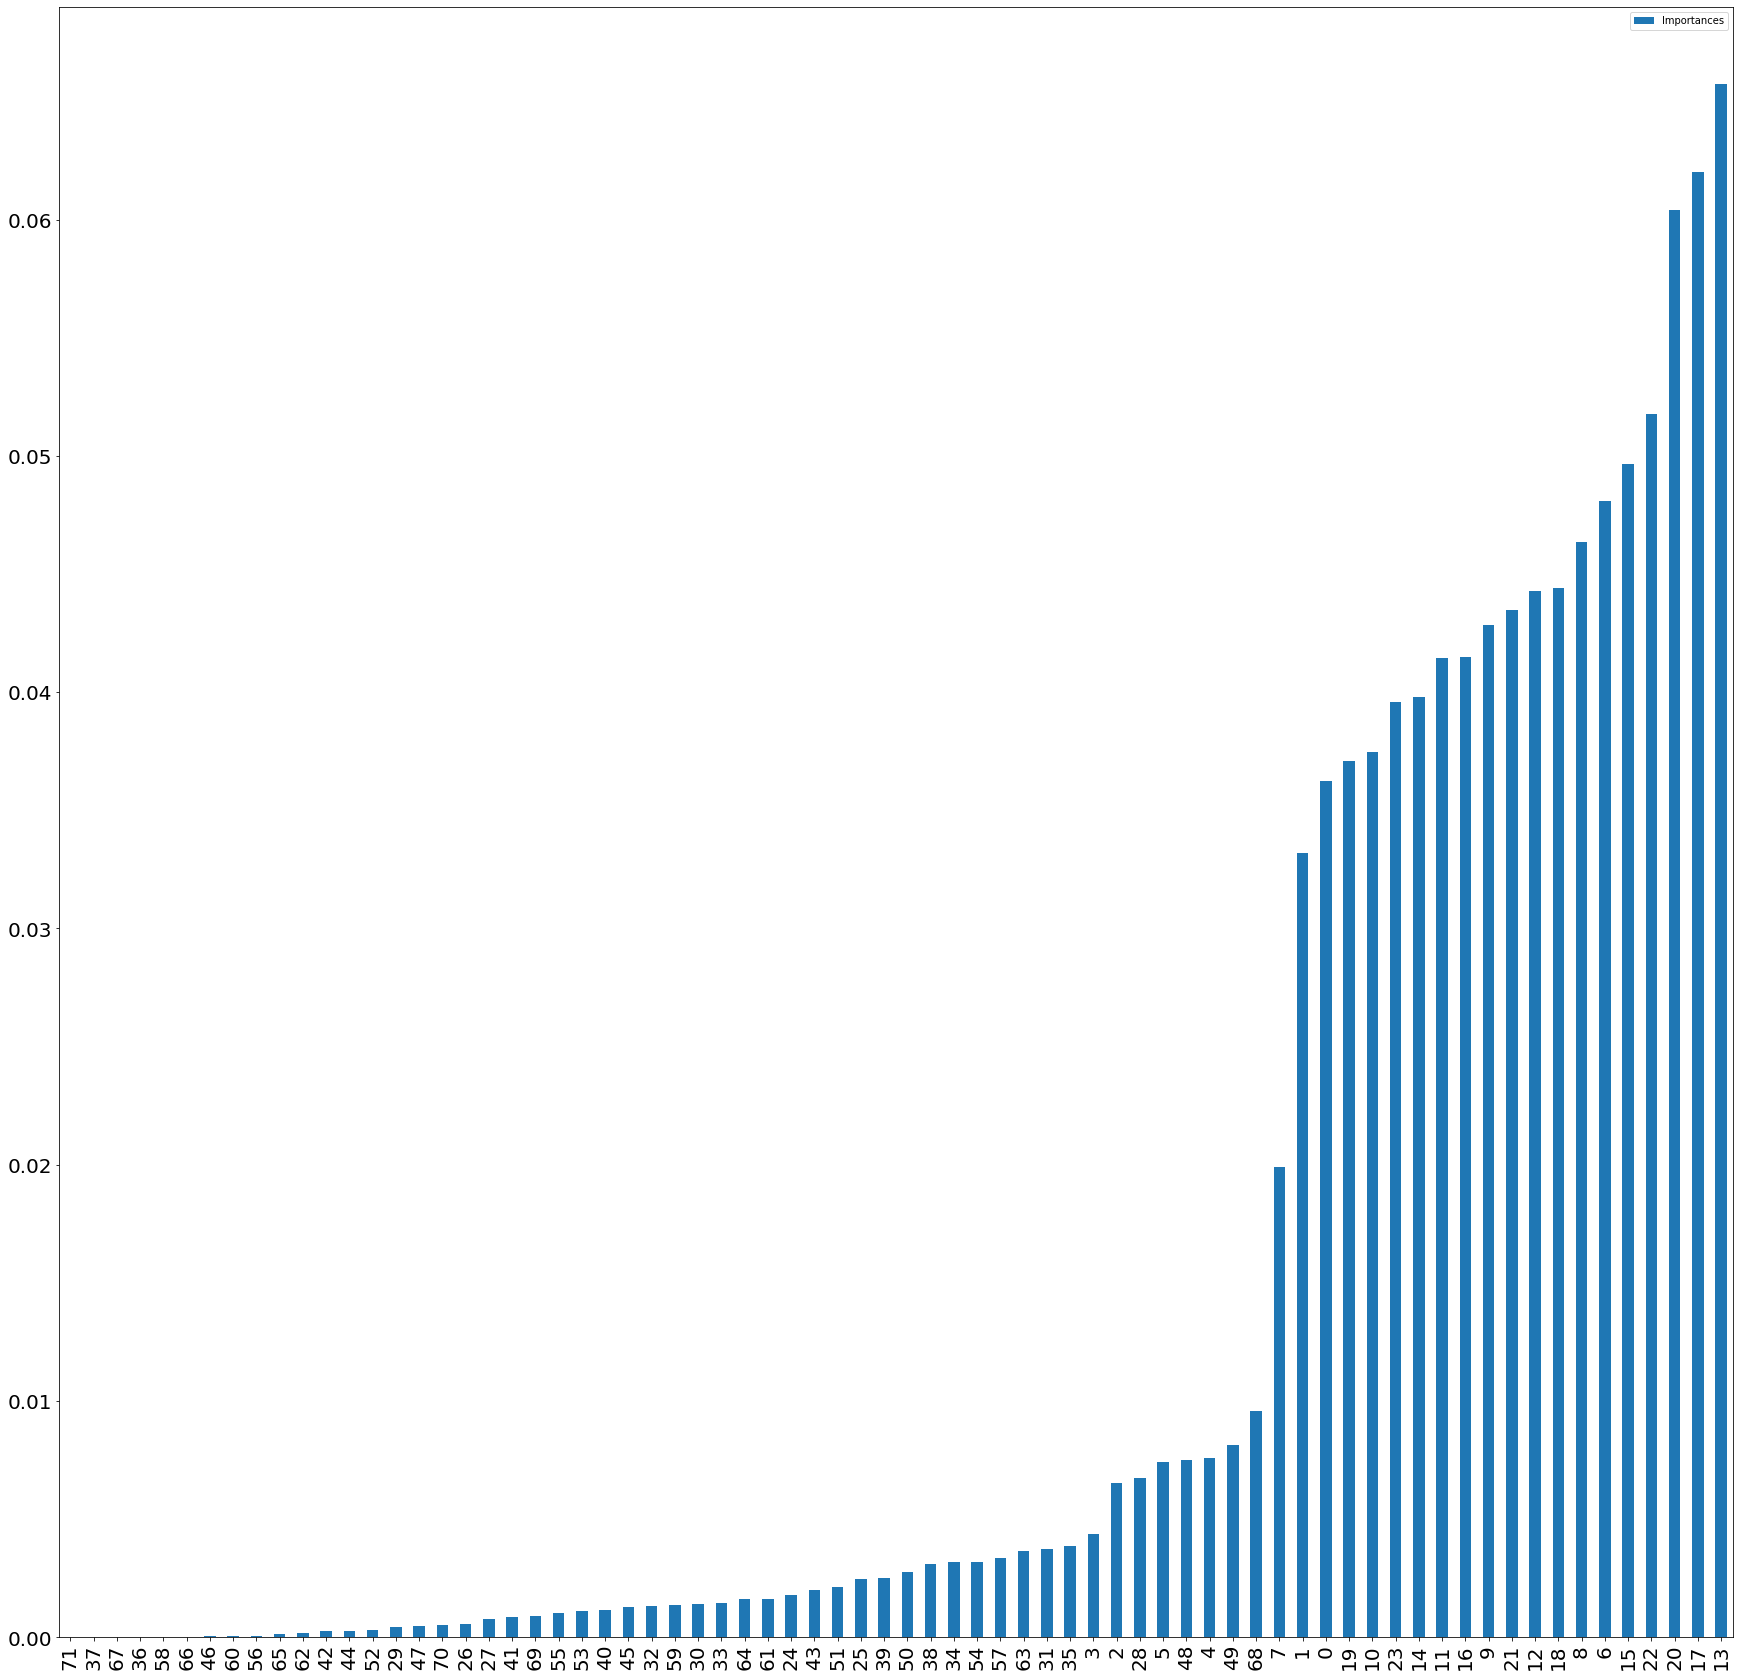

In [17]:
importances = rfc.feature_importances_

final_df = pd.DataFrame({'Features':X_test.columns, 'Importances':importances})
final_df.set_index('Importances')

final_df = final_df.sort_values('Importances')
print(final_df)

final_df.plot.bar(figsize=(30, 30), fontsize=20)

In [18]:
FEATURE_RETAIN = 50
num_feat = final_df.shape[0]
print(num_feat)
final_feature_columns = X_train.columns[final_df.index[num_feat - FEATURE_RETAIN:]]
final_feature_columns = final_feature_columns.insert(0, 'outcome')
final_feature_columns


72


Index(['outcome', 'Diagnosis_5', 'Coagulopathy', 'Alcohol Abuse',
       'Hypothyroidism', 'Anemia_0', 'Other Neurological Disorders',
       'Renal Failure', 'elx3', 'Psyciatric disorder_0',
       'Congestive Heart Failure', 'Fluid and Electrolyte Disorders',
       'Diagnosis_3', 'Valvular Disease', 'Rheumatoid Arthritis/collagen',
       'Diagnosis_2', 'Solid Tumor without Metastasis', 'Liver Disease',
       'Heart disease_0', 'Lung disease_0', 'elx1', 'Diabetes',
       'Peptic Ulcer Disease excluding bleeding', 'Commercial_ALBC', 'Drain',
       'Hypertension Uncomplicated', 'Blood_trans', 'SEX_F',
       'Non_commercial_ALBC', 'Diagnosis_0', 'cci1', 'ASA', 'LOS', 'AGE',
       'GPT', 'CBC_HG', 'UA', 'CBC_Platelet', 'CBC_MCV', 'BUN', 'CBC_RBC',
       'Na', 'CBC_MCHC', 'GOT', 'CBC_WBC', 'OP_time_hour', 'CBC_RDWCV', 'K',
       'ALB', 'Crea', 'CBC_RDW'],
      dtype='object')

In [19]:
final_tr = tr[final_feature_columns]

In [20]:
# final_tr.describe().transpose()

In [21]:
tr_x = final_tr.iloc[:, 1:]
# print(tr_x.shape)
tr_y = final_tr['outcome']
X_train, X_test, y_train, y_test = train_test_split(tr_x, tr_y, test_size=0.2, random_state=8, stratify=tr[['outcome']])


# train_X_new = data_tr.iloc[:, 1:68]
# train_y_new = data_tr.iloc[:, 0]
# train_X = data_tr.ilofit_sample8]
# train_y = data_tr.iloc[:, 0]
# print(train_X.shape)
# val_X = data_te.iloc[:, 1:68]
# val_y = data_te.iloc[:, 0]
# print(val_y.value_counts())

# rus = RandomUnderSampler(random_state=42)
# smote = SMOTE()

# X_train, y_train = rus.fit_sample(X_train, y_train)

n_estim = 200

rfc = tree.DecisionTreeClassifier(random_state=42)

rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)
print(pd.DataFrame(preds).value_counts())

prec = precision_score(y_test, preds)
reca = recall_score(y_test, preds)
roc = roc_auc_score(y_test, preds)
f1 = f1_score(y_test, preds)
acc = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

print("Precision: ", prec)
print("Recall: ", reca)
print("ROC score: ", roc)
print("F1 score: ", f1)
print("Accuracy score: ", acc)
print(conf_mat)


1    142
0    140
dtype: int64
Precision:  0.6197183098591549
Recall:  0.624113475177305
ROC score:  0.6205673758865248
F1 score:  0.6219081272084805
Accuracy score:  0.6205673758865248
[[87 54]
 [53 88]]


In [22]:
final_tr

,outcome,Diagnosis_5,Coagulopathy,Alcohol Abuse,Hypothyroidism,Anemia_0,Other Neurological Disorders,Renal Failure,elx3,Psyciatric disorder_0,...,Na,CBC_MCHC,GOT,CBC_WBC,OP_time_hour,CBC_RDWCV,K,ALB,Crea,CBC_RDW
0,0,0,0,0,0,1,0,0,0,1,...,0.821329,0.598675,0.062684,0.029181,0.207585,0.158672,0.492624,0.624085,0.100308,0.256115
1,0,0,0,0,0,1,0,0,0,1,...,0.817806,0.529801,0.055900,0.022650,0.197605,0.151005,0.463808,0.567798,0.064322,0.066547
2,0,0,0,0,0,1,0,0,0,1,...,0.836979,0.622517,0.059735,0.030578,0.277312,0.137447,0.502573,0.449900,0.117212,0.620504
3,0,0,0,0,0,1,0,0,0,0,...,0.822506,0.597792,0.073451,0.031635,0.337325,0.133707,0.492739,0.597605,0.084598,0.255635
4,0,0,0,0,0,1,0,0,0,1,...,0.817090,0.615011,0.056342,0.035447,0.298736,0.149790,0.448256,0.630739,0.091261,0.301799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,1,0,0,0,0,1,0,0,0,1,...,0.816945,0.598234,0.090708,0.035561,0.278643,0.185601,0.451801,0.319361,0.093152,0.241847
1402,1,0,0,1,0,1,0,0,1,1,...,0.802617,0.620751,0.055015,0.040544,0.274118,0.207574,0.396455,0.513373,0.073206,0.245683
1403,1,0,0,0,0,1,0,0,0,1,...,0.821220,0.603532,0.039823,0.034692,0.282236,0.156241,0.291595,0.508982,0.022209,0.175899
1404,1,0,0,0,0,1,0,0,0,1,...,0.820405,0.634437,0.061209,0.029898,0.303393,0.124825,0.475586,0.535862,0.093317,0.227578


In [30]:
y = final_tr.outcome
final_tr.drop(columns='outcome', inplace=True)
final_tr.insert(final_tr.shape[1], 'outcome', y.to_numpy())

In [31]:
final_tr

,Diagnosis_5,Coagulopathy,Alcohol Abuse,Hypothyroidism,Anemia_0,Other Neurological Disorders,Renal Failure,elx3,Psyciatric disorder_0,Congestive Heart Failure,...,CBC_MCHC,GOT,CBC_WBC,OP_time_hour,CBC_RDWCV,K,ALB,Crea,CBC_RDW,outcome
0,0,0,0,0,1,0,0,0,1,0,...,0.598675,0.062684,0.029181,0.207585,0.158672,0.492624,0.624085,0.100308,0.256115,0
1,0,0,0,0,1,0,0,0,1,0,...,0.529801,0.055900,0.022650,0.197605,0.151005,0.463808,0.567798,0.064322,0.066547,0
2,0,0,0,0,1,0,0,0,1,0,...,0.622517,0.059735,0.030578,0.277312,0.137447,0.502573,0.449900,0.117212,0.620504,0
3,0,0,0,0,1,0,0,0,0,0,...,0.597792,0.073451,0.031635,0.337325,0.133707,0.492739,0.597605,0.084598,0.255635,0
4,0,0,0,0,1,0,0,0,1,0,...,0.615011,0.056342,0.035447,0.298736,0.149790,0.448256,0.630739,0.091261,0.301799,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,0,0,0,0,1,0,0,0,1,0,...,0.598234,0.090708,0.035561,0.278643,0.185601,0.451801,0.319361,0.093152,0.241847,1
1402,0,0,1,0,1,0,0,1,1,0,...,0.620751,0.055015,0.040544,0.274118,0.207574,0.396455,0.513373,0.073206,0.245683,1
1403,0,0,0,0,1,0,0,0,1,0,...,0.603532,0.039823,0.034692,0.282236,0.156241,0.291595,0.508982,0.022209,0.175899,1
1404,0,0,0,0,1,0,0,0,1,0,...,0.634437,0.061209,0.029898,0.303393,0.124825,0.475586,0.535862,0.093317,0.227578,1


#### following is logistic

In [ ]:
# # use logistic regression with penalty =l1 to do feature selection
# # https://stats.stackexchange.com/questions/137100/what-is-the-difference-between-feature-selection-and-dimensionality-reduction
# # difference between feature selection and dimension reduction
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import (
#     precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, accuracy_score
#     )
# import matplotlib.pyplot as plt
# # from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
# smote = SMOTE()
# data_tr, data_te  = train_test_split(tr, test_size=0.2, stratify=tr[['outcome']], random_state=7)
# train_X = data_tr.iloc[:, 1:68]
# train_y = data_tr.iloc[:, 0]
# val_X = data_te.iloc[:, 1:68]
# val_y = data_te.iloc[:, 0]

# # down_tr = data_tr[data_tr['outcome']==1].shape[0]
# # down_te = data_te[data_te['outcome']==1].shape[0]

# # rus = RandomUnderSampler(random_state=42)
# # train_X_new, train_y_new = rus.fit_sample(train_X, train_y)
# smote = SMOTE(random_state=42)
# train_X_new, train_y_new = smote.fit_sample(train_X, train_y)

# n_estim = 50

# rfc = LogisticRegression(penalty='l1',
#                          solver='saga',
#                         max_iter=2000,
#                         C=10)

# rfc.fit(train_X_new, train_y_new)

# preds = rfc.predict(val_X)

# prec = precision_score(val_y, preds)
# reca = recall_score(val_y, preds)
# roc = roc_auc_score(val_y, preds)
# f1 = f1_score(val_y, preds)
# acc = accuracy_score(val_y, preds)
# conf_mat = confusion_matrix(val_y, preds)

# print("Precision: ", prec)
# print("Recall: ", reca)
# print("ROC score: ", roc)
# print("F1 score: ", f1)
# print("Accuracy score: ", acc)
# print(conf_mat)
# # data_tr = data_tr.groupby('outcome').sample(n=2000, random_state=1, replace=True)

# # data_te = data_te.groupby('outcome').sample(n=down_te, random_state=1)


# # n_list = np.arange(120, 500, 10)
# # f1_score = []
# # best_score = 0


# # for n in n_list:
# #     clf = RandomForestClassifier(n_estimators=n)
# #     clf.fit(x_tr, y_tr)
# #     y_pr = clf.predict(x_te)
# #     print(n, end='')
# #     print('='*50)
# #     print(metrics.confusion_matrix(y_pr, y_te))
# #     print(metrics.f1_score(y_te, y_pr))
# #     # metrics.roc_auc_score(y_tr, y_pr_prob[:, 1])
# #     f1 = metrics.f1_score(y_te, y_pr)
# #     f1_score.append(f1)


# # plt.plot(n_list, f1_score)
# # plt.xticks(fontsize=12)
# # plt.yticks(fontsize=12)


In [ ]:
# rf 200 
# 0    10196
# 1      236
# dtype: int64
# Precision:  0.1271186440677966
# Recall:  0.17045454545454544
# ROC score:  0.575184371011204
# F1 score:  0.14563106796116504
# Accuracy score:  0.9662576687116564
# [[10050   206]
#  [  146    30]]


# rf 100 
# 0    10201
# 1      231
# dtype: int64
# Precision:  0.12987012987012986
# Recall:  0.17045454545454544
# ROC score:  0.5754281307615942
# F1 score:  0.1474201474201474
# Accuracy score:  0.9667369631901841
# [[10055   201]
#  [  146    30]]



# rf 100 randomsample                    gwin
# 0    10226
# 1      206
# dtype: int64
# Precision:  0.1553398058252427
# Recall:  0.18181818181818182
# ROC score:  0.5824262515955184
# F1 score:  0.1675392670157068
# Accuracy score:  0.9695168711656442
# [[10082   174]
#  [  144    32]]

# rf 200 randomsample
# 0    10219
# 1      213
# dtype: int64
# Precision:  0.14084507042253522
# Recall:  0.17045454545454544
# ROC score:  0.5763056658629981
# F1 score:  0.15424164524421594
# Accuracy score:  0.9684624233128835
# [[10073   183]
#  [  146    30]]

# smote 100
# 0    10207
# 1      225
# dtype: int64
# Precision:  0.14222222222222222
# Recall:  0.18181818181818182
# ROC score:  0.5814999645440364
# F1 score:  0.15960099750623444
# Accuracy score:  0.9676955521472392
# [[10063   193]
#  [  144    32]]

In [ ]:
#balanced
#logistic penaltyl1
# c=0.4, 0.047310
# c=0.45, 0.034
# c=0.5, 0.06573
# c=0.55, 0.039
# c=0.6, 0.06195
# c=0.8, 0.04834 
# c=0.1, 0.004489
# c=1, 0.03

# none=>baddd



### finally save the outcome

In [34]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('./temp/3_data_transform.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
final_tr.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [35]:
final_tr.shape

(1406, 51)